# Import bibliotek

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__

'2.15.0'

# Załadowanie danych i wstępna eksploracja

In [15]:
(X_train, y_train), (X_test, y_test) = load_data()

In [16]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [17]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [18]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

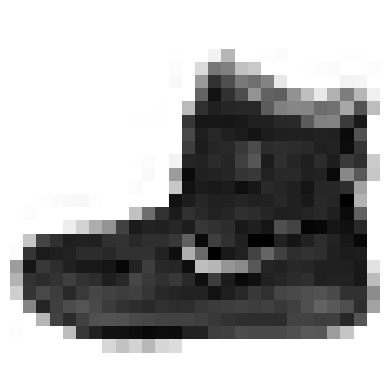

In [19]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

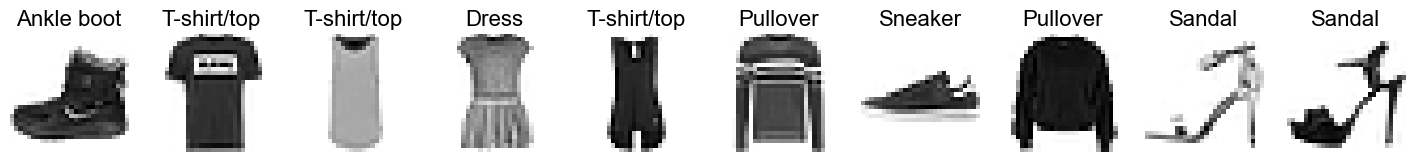

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(class_names[y_train[i-1]], color='black', fontsize=16)
plt.show()

In [21]:
X_train = X_train / 255.
X_test = X_test / 255.

In [22]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Budowa modelu

In [23]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5240 - accuracy: 0.8137 - val_loss: 0.4066 - val_accuracy: 0.8513
Epoch 2/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3854 - accuracy: 0.8620 - val_loss: 0.3795 - val_accuracy: 0.8665
Epoch 3/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3468 - accuracy: 0.8759 - val_loss: 0.3636 - val_accuracy: 0.8727
Epoch 4/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3284 - accuracy: 0.8822 - val_loss: 0.3709 - val_accuracy: 0.8696
Epoch 5/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3137 - accuracy: 0.8881 - val_loss: 0.3448 - val_accuracy: 0.8836
Epoch 6/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3006 - accuracy: 0.8928 - val_loss: 0.3478 - val_accuracy: 0.8835
Epoch 7/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2917 - accuracy: 0.8953 - val_loss: 0.3512 - val_accuracy:

In [25]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.524046,0.813667,0.406566,0.851333,0
1,0.385447,0.862021,0.379506,0.866500,1
2,0.346754,0.875938,0.363556,0.872667,2
3,0.328405,0.882208,0.370938,0.869583,3
4,0.313722,0.888104,0.344793,0.883583,4
5,0.300605,0.892812,0.347823,0.883500,5
6,0.291733,0.895250,0.351161,0.879167,6
7,0.281889,0.898833,0.354890,0.882083,7
8,0.275280,0.901417,0.359812,0.883250,8
9,0.267023,0.906729,0.382073,0.878333,9


In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')
fig.show()

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(test_acc)

0.879800021648407


# Predykcja na podstawie modelu

In [28]:
predictions = model.predict(X_test)
predictions

313/313 [==============================] - 0s 815us/step


array([[0.            , 0.            , 0.            , ..., 0.000000000004, 0.            , 1.            ],
       [0.000000002434, 0.            , 0.99990904    , ..., 0.            , 0.            , 0.            ],
       [0.            , 1.            , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.            , 0.            , 0.            , ..., 0.            , 1.            , 0.            ],
       [0.            , 1.            , 0.            , ..., 0.            , 0.            , 0.            ],
       [0.000000000001, 0.000000000235, 0.            , ..., 0.000045557783, 0.000000677957, 0.000000083172]], dtype=float32)

In [29]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.000000,0.000000,0.999909,0.000000,0.000091,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.975916,0.000000,0.000009,0.000000,0.000000,0.000000,0.024075,0.000000,0.000000,0.000000


In [33]:
predictions_cls = model.predict(X_test)
predictions_cls

313/313 [==============================] - 0s 814us/step


array([[0.            , 0.            , 0.            , ..., 0.000000000004, 0.            , 1.            ],
       [0.000000002434, 0.            , 0.99990904    , ..., 0.            , 0.            , 0.            ],
       [0.            , 1.            , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.            , 0.            , 0.            , ..., 0.            , 1.            , 0.            ],
       [0.            , 1.            , 0.            , ..., 0.            , 0.            , 0.            ],
       [0.000000000001, 0.000000000235, 0.            , ..., 0.000045557783, 0.000000677957, 0.000000083172]], dtype=float32)

### <a name='a7'></a> Klika możliwości poprawy modeli:
* zwiększenie liczby epok
* zwiększenie/zmniejszenie parametrów uczenia, strojenie hiperparametrów
* zwiększenie/zmniejszenie liczby neuronów wewnątrz warstw ukrytych
* zwiększenie/zmniejszenie parametru **batch_size**, czyli rozmiaru wsadu
* zwiększenie/zmniejszenie liczby warstw ukrytych
* zastosowanie regularyzacji (L1 - lasso, L2 - ridge), warstwy Dropout